### A better dataset

Hierarchical dataset based on a binary tree in 2D

In [1]:
cd ..

/home/jovyan/work/MultiscaleEMD


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install -e .

Obtaining file:///home/jovyan/work/MultiscaleEMD
  Preparing metadata (setup.py) ... done
  Attempting uninstall: MultiscaleEMD
    Found existing installation: MultiscaleEMD 0.1.1
    Uninstalling MultiscaleEMD-0.1.1:
      Successfully uninstalled MultiscaleEMD-0.1.1
  Running setup.py develop for MultiscaleEMD


In [4]:
# Construct quadtree programmatically with root at 0,0
import numpy as np

levels = 4
dims = 2

[list(np.binary_repr(a, width=levels)) for a in np.arange(2**levels)]

[['0', '0', '0', '0'],
 ['0', '0', '0', '1'],
 ['0', '0', '1', '0'],
 ['0', '0', '1', '1'],
 ['0', '1', '0', '0'],
 ['0', '1', '0', '1'],
 ['0', '1', '1', '0'],
 ['0', '1', '1', '1'],
 ['1', '0', '0', '0'],
 ['1', '0', '0', '1'],
 ['1', '0', '1', '0'],
 ['1', '0', '1', '1'],
 ['1', '1', '0', '0'],
 ['1', '1', '0', '1'],
 ['1', '1', '1', '0'],
 ['1', '1', '1', '1']]

In [5]:
import itertools


def _cluster(
    center,
    n_levels,
    total_levels,
    dims=2,
):
    """
    Parameters
    ----------

    bounds:
        [2 x D] matrix giving min / max of bounding box for this cluster

    """
    if n_levels == 0:
        return None
    bin_masks = np.array(list(itertools.product([False, True], repeat=dims)))
    shift = 2.5 ** -(total_levels - n_levels + 2)
    shifts = np.array(list(itertools.product([-shift, shift], repeat=dims)))
    cluster_centers = shifts + center
    if n_levels > 1:
        sub_clusters = np.concatenate(
            [_cluster(c, n_levels - 1, total_levels) for c in cluster_centers]
        )
    else:
        sub_clusters = []
    return [*cluster_centers, *sub_clusters]


arr = np.array(_cluster([0, 0], 4, 4))

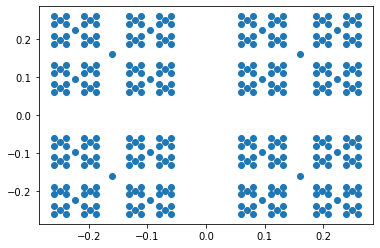

In [6]:
import matplotlib.pyplot as plt

plt.scatter(arr[:, 0], arr[:, 1])

In [7]:
X = arr

In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
labels = model.fit_predict(arr)

In [9]:
from MultiscaleEMD import metric_tree

In [10]:
mt = metric_tree.ClusterTree(arr)

In [11]:
mt.__dict__.keys()

dict_keys(['X', 'leaf_size', 'n_clusters', 'n_levels', 'cluster_method', 'random_state', 'tree', 'indices', 'centers', 'dists'])

In [12]:
mt.tree

array([[  0, 340,   0,   0],
       [  0,  85,   1,   0],
       [ 85, 170,   1,   0],
       [170, 255,   1,   0],
       [255, 340,   1,   0],
       [  0,  22,   2,   1],
       [ 22,  58,   2,   1],
       [ 58,  75,   2,   1],
       [ 75,  85,   2,   1],
       [ 85, 105,   2,   1],
       [105, 121,   2,   1],
       [121, 146,   2,   1],
       [146, 170,   2,   1],
       [170, 183,   2,   1],
       [183, 221,   2,   1],
       [221, 233,   2,   1],
       [233, 255,   2,   1],
       [255, 276,   2,   1],
       [276, 297,   2,   1],
       [297, 318,   2,   1],
       [318, 340,   2,   1]])

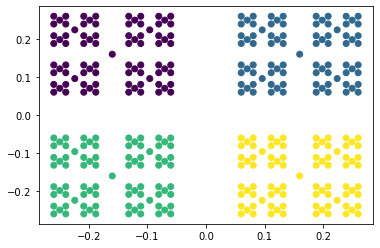

In [13]:
plt.scatter(arr[:, 0], arr[:, 1], c=labels)

In [14]:
from scipy.cluster import hierarchy

rng = np.random.default_rng()
x = rng.random((5, 2))
Z = hierarchy.linkage(x)
hierarchy.to_tree(Z)
rootnode, nodelist = hierarchy.to_tree(Z, rd=True)
rootnode
len(nodelist)

9

In [15]:
from MultiscaleEMD import ClusterTree
from MultiscaleEMD import MetricTree

mt = ClusterTree(arr, n_clusters=4, n_levels=4, leaf_size=1)

In [16]:
mt.tree

array([[  0, 340,   0,   0],
       [  0,  85,   1,   0],
       [ 85, 170,   1,   0],
       [170, 255,   1,   0],
       [255, 340,   1,   0],
       [  0,  21,   2,   0],
       [ 21,  42,   2,   0],
       [ 42,  64,   2,   0],
       [ 64,  85,   2,   0],
       [  0,   5,   3,   1],
       [  5,  10,   3,   1],
       [ 10,  16,   3,   1],
       [ 16,  21,   3,   1],
       [ 21,  26,   3,   1],
       [ 26,  32,   3,   1],
       [ 32,  37,   3,   1],
       [ 37,  42,   3,   1],
       [ 42,  48,   3,   1],
       [ 48,  54,   3,   1],
       [ 54,  59,   3,   1],
       [ 59,  64,   3,   1],
       [ 64,  70,   3,   1],
       [ 70,  75,   3,   1],
       [ 75,  80,   3,   1],
       [ 80,  85,   3,   1],
       [ 85, 107,   2,   0],
       [107, 128,   2,   0],
       [128, 149,   2,   0],
       [149, 170,   2,   0],
       [ 85,  91,   3,   1],
       [ 91,  95,   3,   1],
       [ 95,  97,   3,   1],
       [ 97, 107,   3,   1],
       [107, 111,   3,   1],
       [111, 1

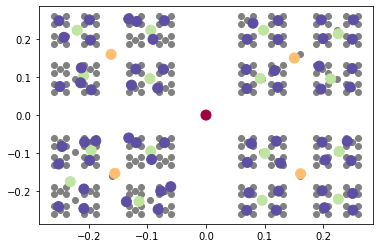

In [17]:
plt.scatter(arr[:, 0], arr[:, 1], c="Gray")
plt.scatter(mt.centers[:, 0], mt.centers[:, 1], c=mt.tree[:, 2], cmap="Spectral", s=100)

In [18]:
print(len(arr))

340


In [19]:
import phate

In [20]:
phate_op = phate.PHATE(random_state=42)

embed = phate_op.fit_transform(arr)

Calculating PHATE...
  Running PHATE on 340 observations and 2 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.08 seconds.
  Calculating optimal t...
    Automatically selected t = 40
  Calculated optimal t in 0.65 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.51 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.08 seconds.
Calculated PHATE in 2.37 seconds.


In [21]:
signal1 = np.random.randn(embed.shape[0])
signal2 = np.random.rand(embed.shape[0])

In [22]:
A = phate_op.graph.kernel.toarray()

In [23]:
signal1.T @ A @ signal1

402.6696476740751

In [24]:
signal2.T @ A @ signal2

507.3505132052434

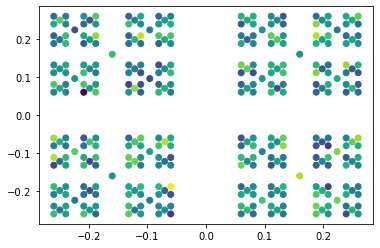

In [25]:
plt.scatter(arr[:, 0], arr[:, 1], c=signal1)

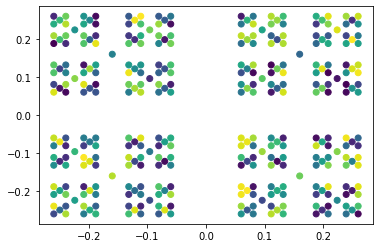

In [26]:
plt.scatter(arr[:, 0], arr[:, 1], c=signal2)

In [27]:
mt.centers

array([[-3.26536184e-19, -3.03678651e-17],
       [ 1.50895410e-01,  1.50070488e-01],
       [-1.61983927e-01,  1.59756051e-01],
       [ 1.61620173e-01, -1.54164845e-01],
       [-1.55573151e-01, -1.53173333e-01],
       [ 9.82780617e-02,  2.23075242e-01],
       [ 2.25877333e-01,  2.13703111e-01],
       [ 2.12782312e-01,  9.52538693e-02],
       [ 9.27324623e-02,  9.62830151e-02],
       [ 1.23125106e-01,  2.48510638e-01],
       [ 1.23033600e-01,  1.98604800e-01],
       [ 8.02133333e-02,  2.41493333e-01],
       [ 7.04000000e-02,  1.99172830e-01],
       [ 2.50041379e-01,  1.99371034e-01],
       [ 1.99917037e-01,  2.01054815e-01],
       [ 2.51569231e-01,  2.50387692e-01],
       [ 1.96841739e-01,  2.50267826e-01],
       [ 2.45896170e-01,  7.36680851e-02],
       [ 1.93465507e-01,  1.28612174e-01],
       [ 1.96266667e-01,  6.82666667e-02],
       [ 2.49600000e-01,  1.22331429e-01],
       [ 1.17067541e-01,  1.17067541e-01],
       [ 6.88110345e-02,  1.19834483e-01],
       [ 1.

In [28]:
# I owe maria a way to evaluate these quantitatively.

# Can add in noise of the specific type to evaluate robustness.

# control alignment, can see patterns of response
# Sqrt norm? split more (log norm)

# Does seurat do euclidean over cluster proportions.

# Perfect transformation correction.

In [29]:
!pwd

'/home/jovyan/work/MultiscaleEMD'

In [30]:
from MultiscaleEMD import dataset

In [ ]:
dataset.Tree(100)